# Laboratorio di Simulazione Numerica
## Esercitazione 12

###  Esercizio 12.1
In questo esercizio vogliamo usare una rete neurale DNN (Deep Neural Network) di tipo sequenziale per riconoscere le cifre da 0 a 9 scritte a mano. Come dati per il training della rete neurale sfruttiamo il dataset MNIST contenente 70000 cifre scritte a mano in formato griglia da 28x28 pixel.

Il codice per creare questa rete neurale è quello fornito dal professore durante le lezioni, in cui si usa una architettura sequenziale formata da:
- Un leyer di input con 784 (28x28) unità, che riceve in ingresso dei valori compresi fra 0 e 1 che indicano la gradazione in scala di grigi del pixel.
- Due layer nascosti, il primo di 400 unità e il secondo di 100 unità, entrambi con funzione di attivazione Relu
- Per il processo di training a ogni epoca viene applicato un Dropout di $0.5$
- Infine si ha il layer di output costituito da 10 unità, corrispondente alle 10 cifre da riconoscere. La funzione di attivazione per quest'ultimo lay è la Softmax, in modo che gli output siano valori fra 0 e 1. Infatti questo questo è un problema di classificazione.
I dati sono divisi in 60000 dati di training e 10000 di validazione e il processo di training procede per 5 epoche.
Il codice per questo esercizio si trova nella directory *DNN*.

Il codice fornito ha già una buona efficentza, avendo una accuratezza del 95%. Vogliamo però studiare come cambiano le performance della rete neurale se usiamo diversi tipi di algoritmi di ottimizzazione, mantenendo inalterati tutti gli altri parametri.

### Ottimizzatore 1 - SGD 1
In questo caso utlizziamo come ottimizzatore lo Stochastic Gradient Descent, in cui i paramentri dell'algoritmo sono quelli di default di Keras, cioé
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
<font face="Courier">SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)</font>
</p>
Di segutio sono riportati i grafici che rappresentano l'evoluzione dell'accuratezza e del costo durante il processo di training per i dati di validazione e di training.

<img src="DNN/SGD_1/loss.png" width="640">
<img src="DNN/SGD_1/accuracy.png" width="640">

Alla fine del training si ha:
- Test loss: 0.1572
- Test accuracy: 0.9501

### Ottimizzatore 2 - SGD 2
In questo caso utlizziamo come ottimizzatore lo Stochastic Gradient Descent, però modifichiamo i parametri dell'algoritmo, in particolare introduciamo l'uso del momento (che permette di tenere traccia dell'evoluzione precedente dell'algoritmo) applicando il momento di Nestorov e introducendo anche il decadimento del learning rate.
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
<font face="Courier">SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)</font>
</p>
Di segutio sono riportati i grafici che rappresentano l'evoluzione dell'accuratezza e del costo durante il processo di training per i dati di validazione e di training.

<img src="DNN/SGD_2/loss.png" width="640">
<img src="DNN/SGD_2/accuracy.png" width="640">

Alla fine del training si ha:
- Test loss: 0.06889
- Test accuracy: 0.9786

### Ottimizzatore 3 - Adagrad
In questo caso utlizziamo come ottimizzatore l'Adagrad', in cui i learning rate cambiano per i vari paramentri in base a quanto sono già stati aggiornati, tenendo conto di tutti i gradienti precedenti.
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
<font face="Courier">optimizer=Adagrad(lr=0.02, epsilon=1e-7, decay=1e-6)</font>
</p>
Di segutio sono riportati i grafici che rappresentano l'evoluzione dell'accuratezza e del costo durante il processo di training per i dati di validazione e di training.

<img src="DNN/Adagrad/loss.png" width="640">
<img src="DNN/Adagrad/accuracy.png" width="640">

Alla fine del training si ha:
- Test loss: 0.0818
- Test accuracy: 0.9735

### Ottimizzatore 4 - Adadelta
In questo caso utlizziamo come ottimizzatore l'Adadelta, simile all'Adagrad ma in cui si tiene conto s0lo di un certo numero di gradienti calcolati precedentemente e non tutti quanti.
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
<font face="Courier">optimizer=Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)</font>
</p>
Di seguito sono riportati i grafici che rappresentano l'evoluzione dell'accuratezza e del costo durante il processo di training per i dati di validazione e di training.

<img src="DNN/Adadelta/loss.png" width="640">
<img src="DNN/Adadelta/accuracy.png" width="640">

Alla fine del training si ha:
- Test loss: 0.08217
- Test accuracy: 0.9781

In generale, rispetto allo Stochastic Gradient Descent, l'introduzione di nuovi elementi all'algoritmo di ottimaizzazione ne ha migliorato l'efficienza. In particolare, rispetto a quelli provati, nel processo di ottimizzazione è utile introdurre un elemento di memoria delle modifiche precedenti ai parametri, come accade per il momento nello SGD o per gli Adadelta e Adagrad. Inoltre il fatto che, guardando i risultati riportati sopra, gli algoritmi che portano a una maggior accuratezza sono lo SGD con momento e l'Adadelta (mentre l'Adagrad ha una accuratezza finale di poco più piccola) fa intuire che è meglio avere un elemento di memoria a breve termine, più che a lungo termine.

### Esercizio 12.2
In questo esercizio vogliamo ancora usare una rete neurale per riconoscere delle cifre scritte a mano, però ora vogliamo costruire una Rete Neurale Convoluzionale. In particolare facciamo uso dei layer di keras **Conv2D** e **MaxPooling2d** che permettono di eseguire una convoluzione dell'input tramite una serie di filtri e successivamente eseguire un coarse-grain dei dati filtrati.
Siccome i dati sono sempre delle grigle 28x28 in scala di grigi, la profondità (numero di canali) dei layer convoluzionali è 1.

Per quanto detto l'unica cosa da modificare rispetto al codice per la DNN è l'architettura della rete neurale, modificando i vari layer in modo da avere dei layer convoluzionali sguiti da dei layer di pooling. Siccome però l'output deve comunque essere un vettore da 10 componenti (normalizzato sempre con la funzione Softmax) a un certo punto bisogna anche introdurre un layer con la classe **Flatten** in modo da trasformare gli output delle varie griglie ottenute con i vari filtri dei layer convoluazionali in dati vettoriali da usare con dei layer di tipo **Dense**.
Il codice per questo esercizio si trova nella directory *CNN*.
Come ottimizzatore si usa lo Stochastic Gradient Descent, in particolare con i parametri configurati come nel secondo esempio dell'esercizio precedente:

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
<font face="Courier">SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)</font>
</p>

L'architettura utilizzata  per questa Rete Neurale Convoluzionale è specificata nel codice dai seguenti layer:

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
<font face="Courier">
model = Sequential() <br>
	model.add(Conv2D(6, kernel_size=(5, 5),	activation='relu', input_shape=input_shape))<br>
	model.add(MaxPooling2D(pool_size=(2,2)))<br>
	model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', input_shape=input_shape)<br>
	model.add(MaxPooling2D(pool_size=(2,2)))<br>
	model.add(Flatten())<br>
	model.add(Dense(60, activation='relu'))<br>
	model.add(Dense(50, activation='relu'))<br>
	model.add(Dropout(0.5))<br>
	model.add(Dense(num_classes, activation='softmax'))
</font>
</p>
Quindi con due layer convoluazionali seguiti dai rispettivi layer di pooling e con due layer densamente connessi. 

Per l'analisi della performance della Rete Neurale consideriamo sempre i valori di Costo e Accuratezza, guardando sempre il loro andamento in funzione del numero di epoche.

<img src="CNN/loss.png" width="640">
<img src="CNN/accuracy.png" width="640">

Alla fine del training si ha:
- Test loss: 0.04192
- Test accuracy: 0.9886

Vediamo che l'accuratezza è di circa il 99%, chiaramente migliore di tutti glie esempi dell'esercizio precedente con la DNN

Di seguito sono riportati degli esempi di predizione della Rete Neurale su alcuni campioni del set di validazione:

<img src="CNN/prediction.png" width="1080">

### Esercizio 12.3
In questo esercizio vogliamo vedere l'effettiva capacita di predizione della Rete Neurale che abbiamo costruito per leggere delle cifre scritte da noi. La rete neurale dell'esercizio precedente è stata salvata nella directory *CNN/Saved*, per cui serve solo recuperarla per poi testarla sui numeri che le forniamo.

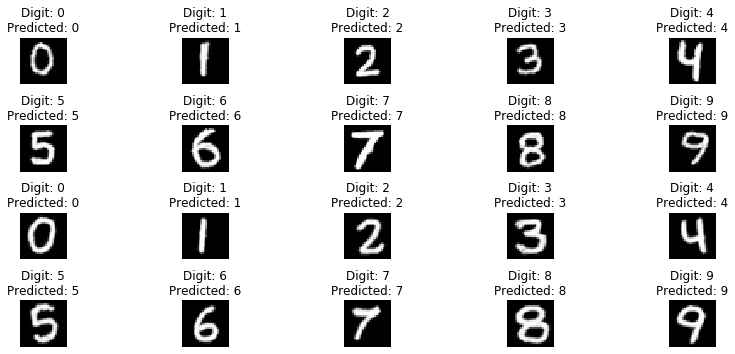

In [8]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from PIL import Image
import os
import tensorflow as tf

X_test = np.zeros((20,28,28))

for i in range(20):
    digit_filename = "./Numbers/num" + str(i) + ".png"
    digit_in = Image.open(digit_filename).convert('L')
    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for k in range(xdim):
            data[k,j]=pix[j,k]
    X_test[i] = data

X_test /= 255

save_model_path='./CNN/Saved/.'
model_CNN = tf.keras.models.load_model(filepath=save_model_path)

X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

predictions = model_CNN.predict(X_test)

plt.figure(figsize=(12, 5))
for i in range(20):    
    ax = plt.subplot(4, 5, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(i%10, np.argmax(predictions[i])))    
    plt.axis('off') 
plt.tight_layout(pad=1.0)
plt.show()